<a href="https://colab.research.google.com/github/Junha9694/orm/blob/main/240124_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
import autokeras as ak

# 데이터 로딩
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리: 스케일링
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 데이터 전처리: 차원 확장 (AutoKeras에 맞게 4D로 만듦)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# AutoKeras 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

# 모델 훈련
history = clf.fit(x_train, y_train, epochs=10)

# 모델 평가
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 20m 11s]
val_loss: 0.03911237791180611

Best val_loss So Far: 0.03911237791180611
Total elapsed time: 00h 20m 11s
Epoch 1/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1593 - accuracy: 0.9517
Epoch 2/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0722 - accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0577 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0444 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0379 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0368 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==

In [4]:
import matplotlib.pyplot as plt

#모델의 구성 출력
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 28, 28, 1)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 28, 28, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0     

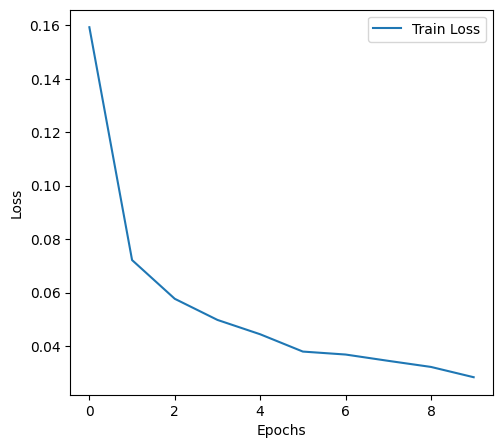

In [5]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

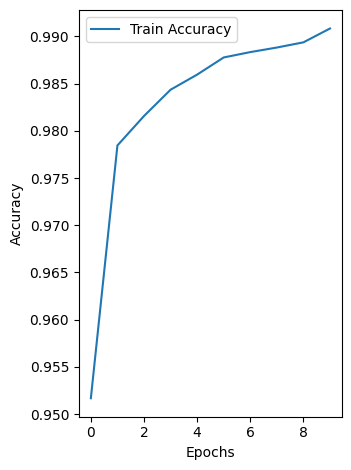

In [6]:
# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=922332e3fae71bac1176a612bec3b20d69119c249f59453fb1ad7a4f10d4e656
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [8]:
import h2o
from h2o.automl import H2OAutoML

# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0tm3dw7f
  JVM stdout: /tmp/tmp0tm3dw7f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0tm3dw7f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_4sviwu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
# 데이터 로드
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
# 데이터 분할
train, test = data.split_frame([0.8])

In [11]:
print(train)
print(test)

  response        x1         x2           x3        x4         x5        x6          x7          x8       x9       x10        x11        x12      x13       x14         x15        x16      x17       x18         x19          x20      x21       x22       x23       x24       x25       x26       x27       x28
         1  0.869293  -0.635082   0.22569     0.32747   -0.689993  0.754202  -0.248573   -1.09206    0        1.37499   -0.653674   0.930349  1.10744  1.1389    -1.5782     -1.04699   0        0.65793   -0.0104546  -0.0457672   3.10196  1.35376   0.979563  0.978076  0.920005  0.721657  0.988751  0.876678
         1  0.907542   0.329147   0.359412    1.49797   -0.31301   1.09553   -0.557525   -1.58823    2.17308  0.812581  -0.213642   1.27101   2.21487  0.499994  -1.26143     0.732156  0        0.398701  -1.13893    -0.00081911  0        0.30222   0.833048  0.9857    0.978098  0.779732  0.992356  0.798343
         1  0.798835   1.47064   -1.63597     0.453773   0.425629  1.10487    1.28

In [12]:
# 응답 변수 및 입력 변수 설정
response = "response"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [13]:
# AutoML 설정 및 실행
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [14]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20240124_70913     0.781575   0.558504  0.798483                0.32302   0.435769  0.189894
StackedEnsemble_AllModels_2_AutoML_1_20240124_70913     0.780862   0.5592    0.79744                 0.319624  0.43606   0.190149
StackedEnsemble_BestOfFamily_3_AutoML_1_20240124_70913  0.776793   0.563161  0.792919                0.335402  0.437917  0.191772
StackedEnsemble_BestOfFamily_1_AutoML_1_20240124_70913  0.776593   0.563186  0.793087                0.33657   0.438016  0.191858
StackedEnsemble_BestOfFamily_2_AutoML_1_20240124_70913  0.776432   0.563377  0.792648                0.327148  0.43808   0.191914
GBM_1_AutoML_1_20240124_70913                           0.774674   0.565635  0.792412                0.339884  0.438956  0.192682
GBM_3_AutoML_1_20240124_70913                           0.773039   0.568607  0.789606     

In [15]:
# 최고 성능 모델 예측
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [17]:
import h2o
from h2o.automl import H2OAutoML

# 1. H2O 초기화
h2o.init()

# 2. 데이터 로딩
data = h2o.import_file("/content/california_housing_train.csv")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 mins 39 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_4sviwu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.156 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


H2OResponseError: Server error water.exceptions.H2ONotFoundArgumentException:
  Error: File /content/california_housing_train.csv does not exist
  Request: POST /3/ImportFilesMulti
    data: {'paths': '[/content/california_housing_train.csv]'}


In [ ]:
# 데이터의 기본 정보 및 처음 5행을 확인
data.describe()
data.head(5)

In [ ]:
# 3. 데이터 분할
# 'medv' 열은 보스턴 주택 데이터셋의 목표 변수 (주택의 중간 가격)
response = "median_house_value"
train, test = data.split_frame(ratios=[0.8])

In [ ]:
# 4. AutoML 실행
# max_runtime_secs은 모델 학습에 허용된 최대 시간을 지정
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

In [ ]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())